<a href="https://colab.research.google.com/github/AyorindeTayo/Building-Cost-prediction-/blob/main/Faith_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Costdata3.csv to Costdata3 (1).csv


{'Costdata3 (1).csv': b'\xef\xbb\xbfProject ,Landcost,Buildingcost,Developmentcost,Financecost,FinalconstructionCost\r\n1,10452000,97688000,8537000,5874000,122551000\r\n2,33630000,204763000,20260000,13683000,272336000\r\n3,5738000,29527000,11631000,2137000,49033000\r\n4,82207000,286683133,53675000,2292100,424857233\r\n5,18400900,50857731,5260994,1634147,76153772\r\n6,21645000,38847000,4041000,338700,64871700\r\n7,14555000,28525000,1192000,572800,44844800\r\n8,16750000,177305564,5812000,10410750,210278314\r\n9,61284817,445675209,29074667.5,13279602,549314295.5\r\n10,47009004,258991921,17484855.92,14242612,337728392.9\r\n11,15607884,88486017,17338483,1600000,123032384\r\n12,28775705,156906962,26872318,5534000,218088985\r\n13,532634322.6,1358412350,81569722,64043650,2036660045\r\n14,80000000,406967468,41059508,19234542,547261518\r\n15,25007000,232804879.1,19124145.08,10088775,287024799.2\r\n16,50000000,204467557.7,4543241.3,10767293,269778092\r\n17,13869000,70672285.59,8943994,3719000,972

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
df=pd.read_csv('Costdata3.csv')
df.head(19)

,Project,Landcost,Buildingcost,Developmentcost,Financecost,FinalconstructionCost
0,1,10452000.0,9.768800e+07,8537000.00,5874000,1.225510e+08
1,2,33630000.0,2.047630e+08,20260000.00,13683000,2.723360e+08
2,3,5738000.0,2.952700e+07,11631000.00,2137000,4.903300e+07
3,4,82207000.0,2.866831e+08,53675000.00,2292100,4.248572e+08
4,5,18400900.0,5.085773e+07,5260994.00,1634147,7.615377e+07
5,6,21645000.0,3.884700e+07,4041000.00,338700,6.487170e+07
6,7,14555000.0,2.852500e+07,1192000.00,572800,4.484480e+07
7,8,16750000.0,1.773056e+08,5812000.00,10410750,2.102783e+08
8,9,61284817.0,4.456752e+08,29074667.50,13279602,5.493143e+08
9,10,47009004.0,2.589919e+08,17484855.92,14242612,3.377284e+08


In [ ]:

# Load the dataset
data = pd.read_csv('Costdata3.csv')

In [ ]:
# Features and target
X = data[['Landcost', 'Buildingcost', 'Developmentcost', 'Financecost']]
y = data['FinalconstructionCost']

**Statistical analysis**

In [ ]:

# Calculate statistics for features
train_stats = X.describe().transpose()

# Save to CSV file
train_stats.to_csv("feature_statistics.csv", index=True)

print("Feature statistics saved to 'feature_statistics.csv'")


Feature statistics saved to 'feature_statistics.csv'


In [ ]:
# Calculate statistics for features
train_stats = X.describe().transpose()

# Display the statistics
print("Feature Statistics:")
print(train_stats)

# Save the statistics to a CSV file
train_stats.to_csv("feature_statistics.csv", index=True)

print("Feature statistics saved to 'feature_statistics.csv'")


Feature Statistics:
                 count          mean           std         min           25%  \
Landcost          19.0  5.986288e+07  1.167191e+08   5738000.0  1.617894e+07   
Buildingcost      19.0  2.460040e+08  2.964003e+08  28525000.0  7.957915e+07   
Developmentcost   19.0  2.267358e+07  2.075106e+07   1192000.0  7.174500e+06   
Financecost       19.0  1.084004e+07  1.409742e+07    338700.0  2.214550e+06   

                          50%           75%           max  
Landcost         2.693900e+07  5.144500e+07  5.326343e+08  
Buildingcost     2.044676e+08  2.728375e+08  1.358412e+09  
Developmentcost  1.748486e+07  2.820633e+07  8.156972e+07  
Financecost      1.008878e+07  1.327318e+07  6.404365e+07  
Feature statistics saved to 'feature_statistics.csv'


**Normalization**

In [ ]:
# Import the necessary class
from sklearn.preprocessing import MinMaxScaler
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
# Check data types of each column
print(X.dtypes)



# Print all data points
print(X)
# or display(X) for a formatted output in Jupyter Notebook

Landcost           float64
Buildingcost       float64
Developmentcost    float64
Financecost          int64
dtype: object
       Landcost  Buildingcost  Developmentcost  Financecost
0    10452000.0  9.768800e+07       8537000.00      5874000
1    33630000.0  2.047630e+08      20260000.00     13683000
2     5738000.0  2.952700e+07      11631000.00      2137000
3    82207000.0  2.866831e+08      53675000.00      2292100
4    18400900.0  5.085773e+07       5260994.00      1634147
5    21645000.0  3.884700e+07       4041000.00       338700
6    14555000.0  2.852500e+07       1192000.00       572800
7    16750000.0  1.773056e+08       5812000.00     10410750
8    61284817.0  4.456752e+08      29074667.50     13279602
9    47009004.0  2.589919e+08      17484855.92     14242612
10   15607884.0  8.848602e+07      17338483.00      1600000
11   28775705.0  1.569070e+08      26872318.00      5534000
12  532634322.6  1.358412e+09      81569722.00     64043650
13   80000000.0  4.069675e+08      410

In [ ]:
import pandas as pd

# Assuming X is your original DataFrame
X_normalized = scaler.fit_transform(X)

# Convert normalized data back to a DataFrame
normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Print the normalized data
print(normalized_df)


    Landcost  Buildingcost  Developmentcost  Financecost
0   0.008947      0.052007         0.091381     0.086890
1   0.052936      0.132521         0.237230     0.209470
2   0.000000      0.000753         0.129874     0.028229
3   0.145131      0.194120         0.652955     0.030663
4   0.024033      0.016793         0.050623     0.020335
5   0.030190      0.007762         0.035445     0.000000
6   0.016734      0.000000         0.000000     0.003675
7   0.020900      0.111875         0.057479     0.158105
8   0.105423      0.313673         0.346895     0.203138
9   0.078329      0.173298         0.202704     0.218255
10  0.018732      0.045087         0.200883     0.019799
11  0.043723      0.096536         0.319495     0.081553
12  1.000000      1.000000         1.000000     1.000000
13  0.140942      0.284567         0.496002     0.296615
14  0.036571      0.153607         0.223098     0.153051
15  0.084005      0.132299         0.041694     0.163701
16  0.015432      0.031692     

In [ ]:
print(normalized_df.isna().sum())  # Check for NaN values
print((normalized_df == np.inf).sum())  # Check for infinite values


Landcost           0
Buildingcost       0
Developmentcost    0
Financecost        0
dtype: int64
Landcost           0
Buildingcost       0
Developmentcost    0
Financecost        0
dtype: int64


In [ ]:
scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [ ]:
# Import the necessary function
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data
X_train, X_train, y_train, y_train = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
# Build and train the model
def build_and_train_model(hidden_layers=3, neurons_per_layer=4, activation='relu', learning_rate=0.001, epochs=100):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation=activation, input_shape=[X_train.shape[1]]))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(neurons_per_layer, activation=activation))
    model.add(keras.layers.Dense(1))  # Output layer for regression

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae', 'mse'])

    # Early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )

    # Evaluate the model on training, validation, and test sets
    train_loss, train_mae, train_mse = model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_mae, val_mse = model.evaluate(X_val, y_val, verbose=0)
    test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)

    return {
        'Hidden Layers': hidden_layers,
        'Neurons': neurons_per_layer,
        'Epochs': epochs,
        'Training MAE': train_mae,
        'Training MSE': train_mse,
        'Validation MAE': val_mae,
        'Validation MSE': val_mse,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Model': model,
        'History': history.history  # Return the history object
    }
# Experiment with different configurations
results = []
configurations = [
    (2, 4, 50),  # 2 hidden layers, 4 neurons, 50 epochs
    (3, 4, 100),  # 3 hidden layers, 4 neurons, 100 epochs
    (4, 4, 150),  # 4 hidden layers, 4 neurons, 150 epochs
]

for hidden_layers, neurons, epochs in configurations:
    print(f"Training: {hidden_layers} layers, {neurons} neurons, {epochs} epochs")
    results.append(build_and_train_model(hidden_layers, neurons, epochs=epochs))

# Convert results to a DataFrame
results_df = pd.DataFrame(results).drop(columns=['Model'])  # Drop model column for clarity
print("\nAll Configurations:\n", results_df)

# Find the best configuration
best_config = results_df.sort_values(by='Validation MAE').iloc[0]
print("\nBest Configuration:\n", best_config)

# Save results to CSV
results_df.to_csv('model_performance_results.csv', index=False)

Training: 2 layers, 4 neurons, 50 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training: 3 layers, 4 neurons, 100 epochs
Training: 4 layers, 4 neurons, 150 epochs

All Configurations:
    Hidden Layers  Neurons  Epochs  Training MAE  Training MSE  Validation MAE  \
0              2        4      50      0.058110      0.004790        0.058294   
1              3        4     100      0.042685      0.002902        0.039520   
2              4        4     150      0.063185      0.006724        0.066338   

   Validation MSE  Test MAE  Test MSE  \
0        0.005981  0.057926  0.003599   
1        0.003699  0.045849  0.002104   
2        0.009704  0.060031  0.003744   

                                             History  
0  {'loss': [0.013547451235353947, 0.012891530059...  
1  {'loss': [0.014239758253097534, 0.013775597326...  
2  {'loss': [0.01451170165091753, 0.0143361007794...  

Best Configuration:
 Hidden Layers                                                     3
Neurons                                                           4
Epochs                    

# New Section

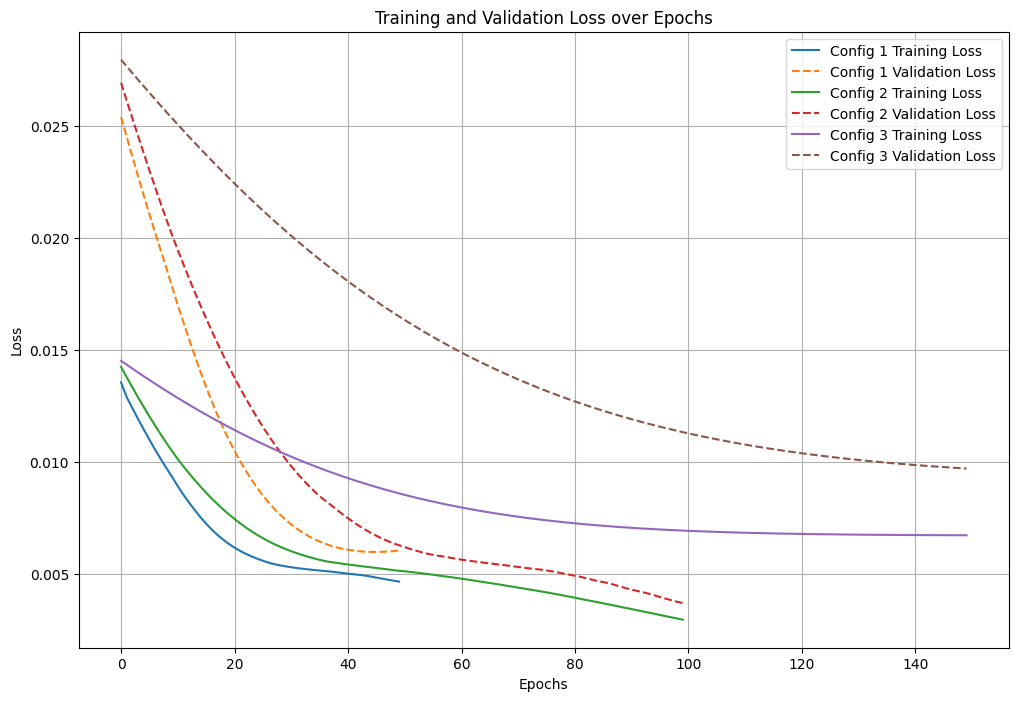

In [ ]:
# Plot 1: Training and Validation Loss over Epochs for Each Configuration
plt.figure(figsize=(12, 8))
for i, result in enumerate(results):
    history = result['History']  # Access the history object
    plt.plot(history['loss'], label=f'Config {i+1} Training Loss')
    plt.plot(history['val_loss'], label=f'Config {i+1} Validation Loss', linestyle='--')

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("loss.png", dpi=300, bbox_inches='tight')
plt.show()

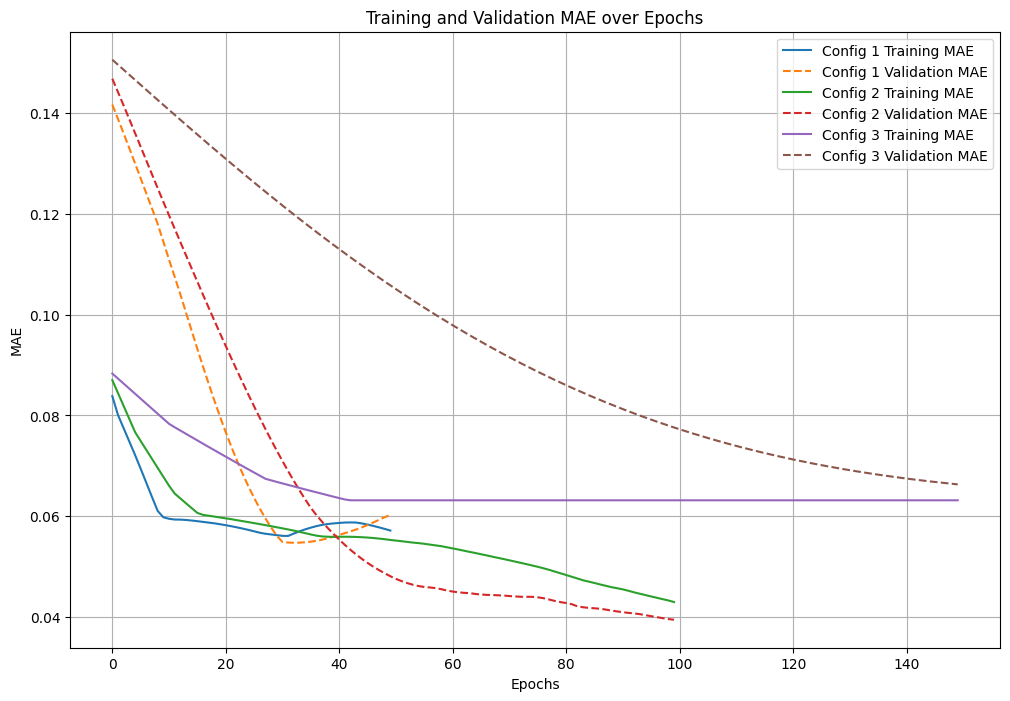

In [ ]:


# Plot 2: Training and Validation MAE over Epochs for Each Configuration
plt.figure(figsize=(12, 8))
for i, result in enumerate(results):
    history = result['History']  # Access the history object
    plt.plot(history['mae'], label=f'Config {i+1} Training MAE')
    plt.plot(history['val_mae'], label=f'Config {i+1} Validation MAE', linestyle='--')

plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.savefig("mae_plot.png", dpi=300, bbox_inches='tight')
plt.show()

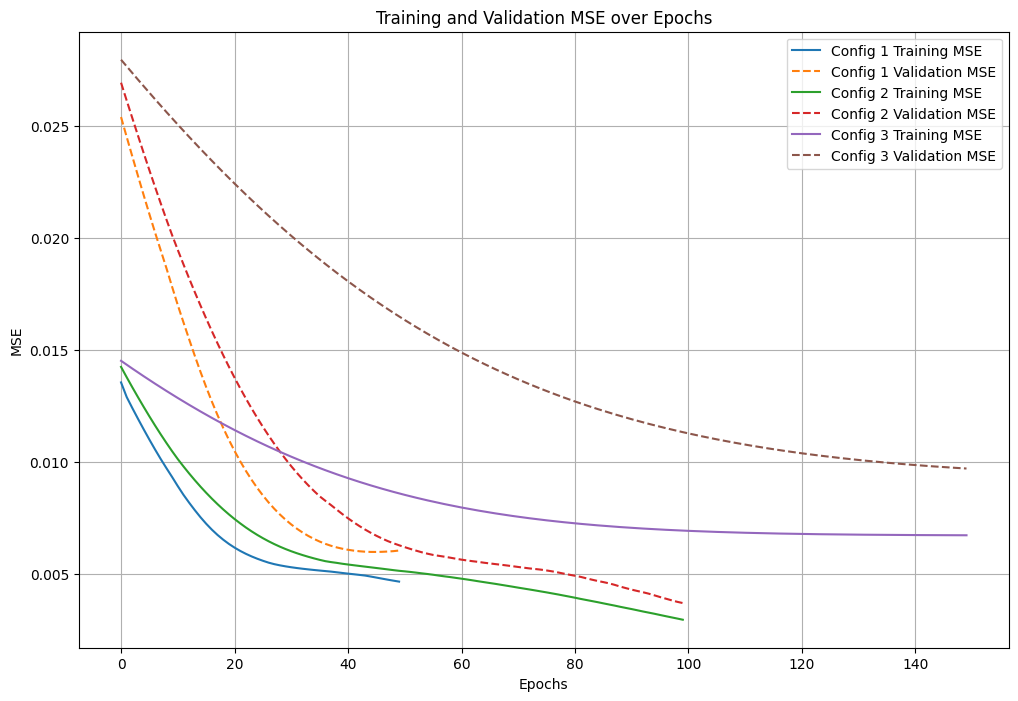

In [ ]:
# Plot 2: Training and Validation MSE over Epochs for Each Configuration
plt.figure(figsize=(12, 8))
for i, result in enumerate(results):
    history = result['History']  # Access the history object
    plt.plot(history['mse'], label=f'Config {i+1} Training MSE')
    plt.plot(history['val_mse'], label=f'Config {i+1} Validation MSE', linestyle='--')

plt.title('Training and Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.savefig("mse_plot.png", dpi=300, bbox_inches='tight')
plt.show()

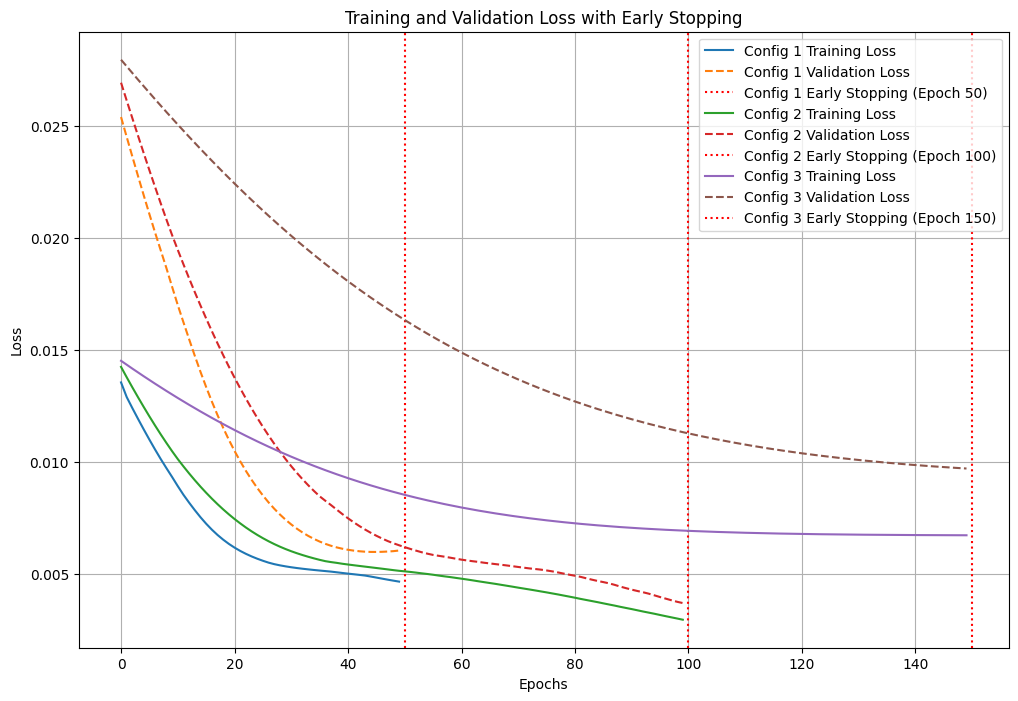

In [ ]:
import matplotlib.pyplot as plt

# Function to plot early stopping
def plot_early_stopping(results):
    plt.figure(figsize=(12, 8))

    for i, result in enumerate(results):
        history = result['History']
        model = result['Model']

        # Plot training and validation loss
        plt.plot(history['loss'], label=f'Config {i+1} Training Loss')
        plt.plot(history['val_loss'], label=f'Config {i+1} Validation Loss', linestyle='--')

        # Find the epoch where early stopping occurred
        early_stop_epoch = len(history['val_loss']) - model.history.params['epochs'] + model.history.params['epochs']
        plt.axvline(x=early_stop_epoch, color='red', linestyle=':',
                    label=f'Config {i+1} Early Stopping (Epoch {early_stop_epoch})')

    plt.title('Training and Validation Loss with Early Stopping')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig("earlystopping.png", dpi=300, bbox_inches='tight')
    plt.show()


# Call the function to plot
plot_early_stopping(results)

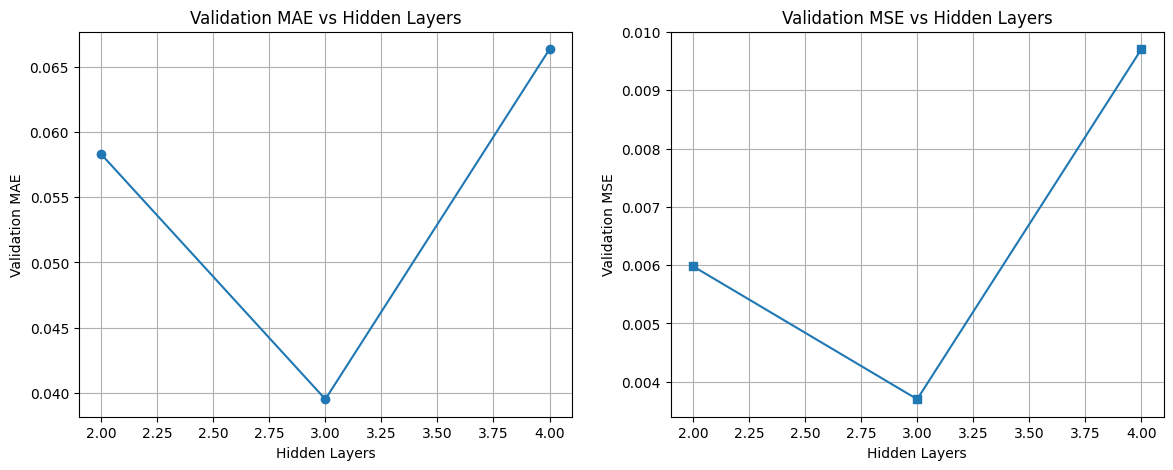

In [ ]:
import matplotlib.pyplot as plt

# Model Performance vs Configurations
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(results_df['Hidden Layers'], results_df['Validation MAE'], marker='o', linestyle='-')
ax[0].set_title('Validation MAE vs Hidden Layers')
ax[0].set_xlabel('Hidden Layers')
ax[0].set_ylabel('Validation MAE')
ax[0].grid()

ax[1].plot(results_df['Hidden Layers'], results_df['Validation MSE'], marker='s', linestyle='-')
ax[1].set_title('Validation MSE vs Hidden Layers')
ax[1].set_xlabel('Hidden Layers')
ax[1].set_ylabel('Validation MSE')
ax[1].grid()

# Define the save_and_show_plot function
def save_and_show_plot(fig, filename):
    """Saves the plot to a file and displays it."""
    fig.savefig(filename, dpi=300, bbox_inches='tight')  # Save the plot
    plt.show()  # Display the plot

# Call the function to save and display the plot
save_and_show_plot(fig, 'performance_vs_layers.png')

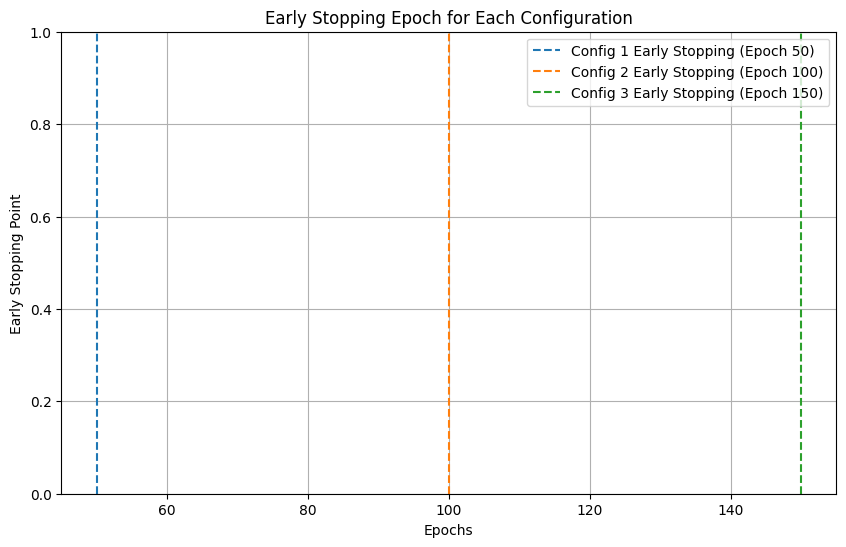

In [ ]:
import matplotlib.pyplot as plt

# Function to plot early stopping epoch
def plot_early_stopping_epoch(results):
    plt.figure(figsize=(10, 6))

    for i, result in enumerate(results):
        history = result['History']
        model = result['Model']

        # Find the epoch where early stopping occurred
        early_stop_epoch = len(history['val_loss'])  # Early stopping epoch is the last epoch trained

        # Plot a vertical line at the early stopping epoch
        plt.axvline(x=early_stop_epoch, color=f'C{i}', linestyle='--',
                    label=f'Config {i+1} Early Stopping (Epoch {early_stop_epoch})')

    plt.title('Early Stopping Epoch for Each Configuration')
    plt.xlabel('Epochs')
    plt.ylabel('Early Stopping Point')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_early_stopping_epoch(results)

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume X and y are your original features and target variable
# Normalize features and target variable
X_scaler = StandardScaler()
y_scaler = StandardScaler()  # Store this for later denormalization

X_normalized = X_scaler.fit_transform(X)

y_normalized = y_scaler.fit_transform(y.values.reshape(-1, 1))  # Reshape needed for single column
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Build and train the model function
def build_and_train_model(hidden_layers=3, neurons_per_layer=4, activation='relu', learning_rate=0.001, epochs=100):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation=activation, input_shape=[X_train.shape[1]]))

    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(neurons_per_layer, activation=activation))

    model.add(keras.layers.Dense(1))  # Output layer for regression

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae', 'mse',])

    # Early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )

    return model

# Train the model using the given configuration
best_model = build_and_train_model(hidden_layers=3, neurons_per_layer=4, epochs=100)

# Predict on the full dataset (19 data points)
predictions = best_model.predict(X_normalized)

# **Denormalize values using the saved y_scaler**
y_denormalized_actual = y_scaler.inverse_transform(y_normalized.reshape(-1, 1)).flatten()
y_denormalized_predicted = y_scaler.inverse_transform(predictions).flatten()

# Create a DataFrame with denormalized actual and predicted values
results_df = pd.DataFrame({
    'Actual_FinalconstructionCost': y_denormalized_actual,
    'Predicted_FinalconstructionCost': y_denormalized_predicted
})

# Calculate error metrics for each data point
results_df['Absolute_Error'] = abs(results_df['Actual_FinalconstructionCost'] - results_df['Predicted_FinalconstructionCost'])
results_df['Squared_Error'] = (results_df['Actual_FinalconstructionCost'] - results_df['Predicted_FinalconstructionCost']) ** 2


# Calculate absolute percentage error
results_df['Percentage_Error'] = (results_df['Absolute_Error'] / results_df['Actual_FinalconstructionCost']) * 10
# Save results to CSV
results_df.to_csv('final_construction_cost_predictions12.csv', index=False)

#Print summary
print("\nPrediction Results:\n", results_df )
print("\nMean Absolute Error (MAE):", results_df['Absolute_Error'].mean())
print("\nMean Squared Error (MSE):", results_df['Squared_Error'].mean())




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Prediction Results:
     Actual_FinalconstructionCost  Predicted_FinalconstructionCost  \
0                   1.225510e+08                     2.947048e+08   
1                   2.723360e+08                     3.057168e+08   
2                   4.903300e+07                     2.941494e+08   
3                   4.248572e+08                     3.352563e+08   
4                   7.615377e+07                     2.941494e+08   
5                   6.487170e+07                     2.941494e+08   
6                   4.484480e+07                     2.941494e+08   
7                   2.102783e+08                     2.941494e+08   
8                   5.493143e+08                     5.135463e+08   
9                   3.377284e+08                     3.706534e+08   
10                  1.230324e+08                     2.941494e+08   
11                  2.180890e+08                     2.969522e+08   
12                  2.036660e+09           

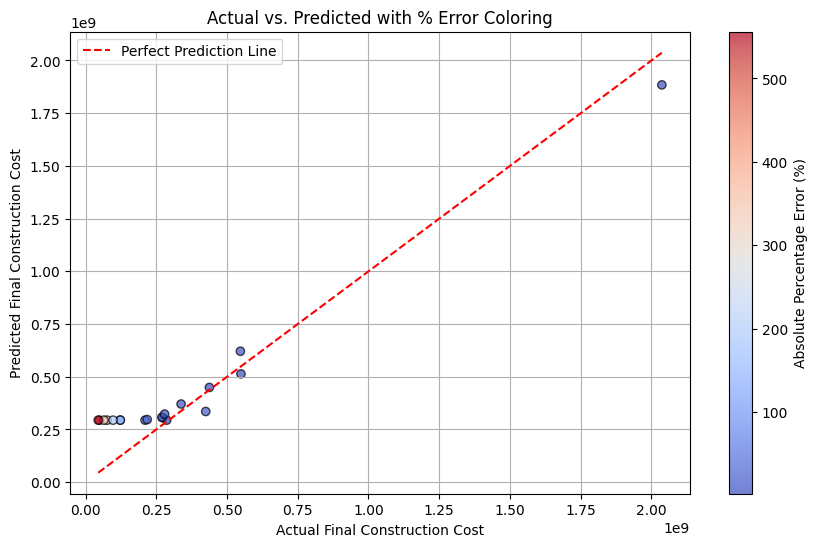

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual_FinalconstructionCost'], results_df['Predicted_FinalconstructionCost'],
            c=results_df['Percentage_Error'], cmap='coolwarm', alpha=0.7, edgecolors='black')
plt.colorbar(label="Absolute Percentage Error (%)")
plt.plot([results_df['Actual_FinalconstructionCost'].min(), results_df['Actual_FinalconstructionCost'].max()],
         [results_df['Actual_FinalconstructionCost'].min(), results_df['Actual_FinalconstructionCost'].max()],
         'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Final Construction Cost")
plt.ylabel("Predicted Final Construction Cost")
plt.title("Actual vs. Predicted with % Error Coloring")
plt.legend()
plt.grid()
# Save the figure as a PNG file
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()


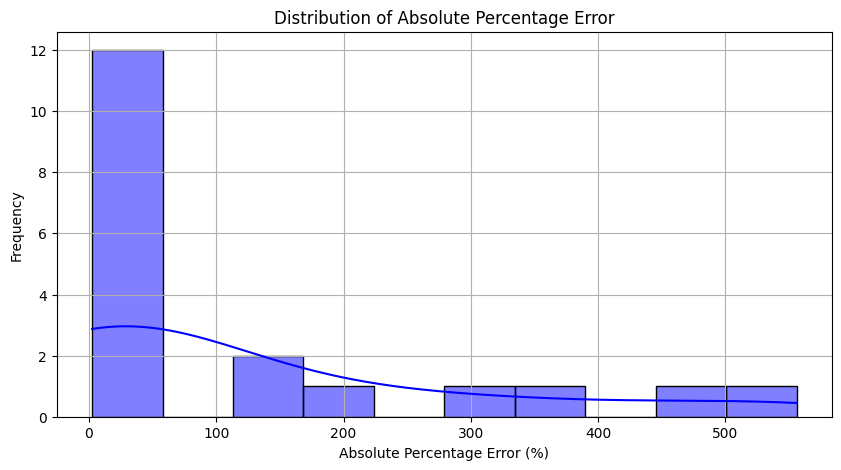

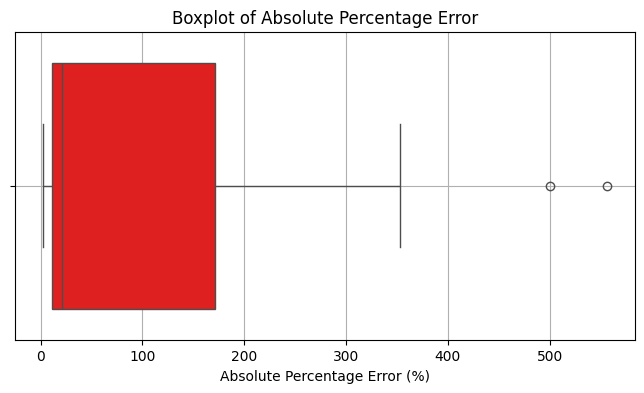

Summary Statistics:
 count     19.000000
mean     124.164209
std      175.965209
min        2.482216
25%       11.003093
50%       21.089667
75%      171.542348
max      555.927501
Name: Percentage_Error, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot Histogram of APE
plt.figure(figsize=(10, 5))
sns.histplot(results_df['Percentage_Error'], bins=10, kde=True, color="blue")
plt.xlabel("Absolute Percentage Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Absolute Percentage Error")
plt.grid()
plt.show()

# Plot Boxplot to Identify Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=results_df['Percentage_Error'], color="red")
plt.xlabel("Absolute Percentage Error (%)")
plt.title("Boxplot of Absolute Percentage Error")
plt.grid()
# Save the boxplot as a PNG file
plt.savefig('boxplot_ape.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("Summary Statistics:\n", results_df['Percentage_Error'].describe()) # Changed column name here

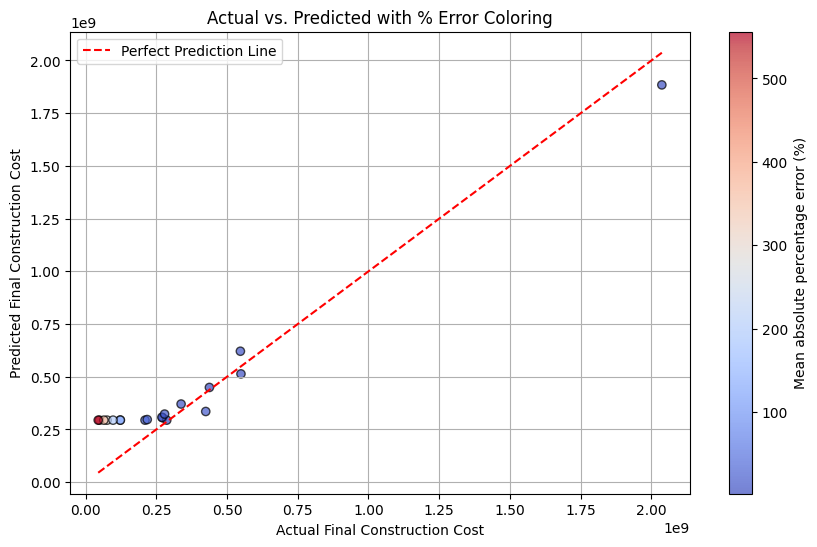

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual_FinalconstructionCost'], results_df['Predicted_FinalconstructionCost'],
            c=results_df['Percentage_Error'], cmap='coolwarm', alpha=0.7, edgecolors='black')
plt.colorbar(label="Mean absolute percentage error (%)")
plt.plot([results_df['Actual_FinalconstructionCost'].min(), results_df['Actual_FinalconstructionCost'].max()],
         [results_df['Actual_FinalconstructionCost'].min(), results_df['Actual_FinalconstructionCost'].max()],
         'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Final Construction Cost")
plt.ylabel("Predicted Final Construction Cost")
plt.title("Actual vs. Predicted with % Error Coloring")
plt.legend()
plt.grid()
# Save the figure as a PNG file
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

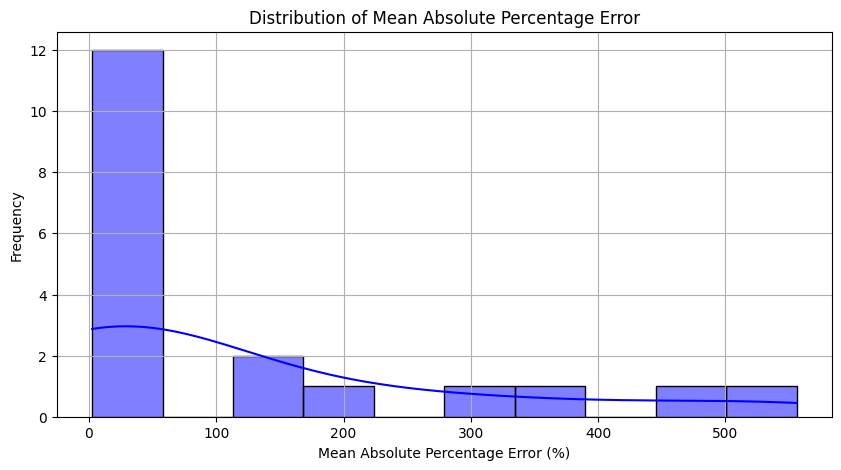

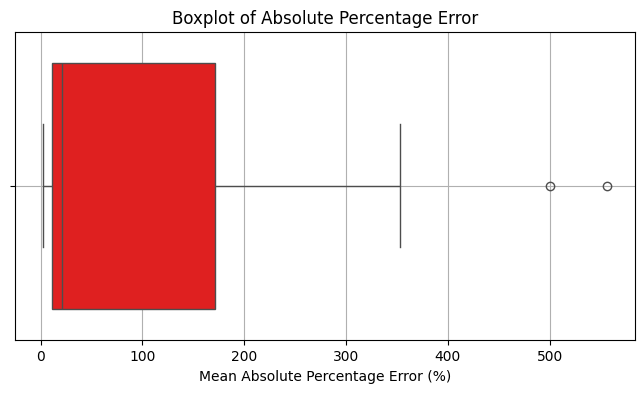

Summary Statistics:
 count     19.000000
mean     124.164209
std      175.965209
min        2.482216
25%       11.003093
50%       21.089667
75%      171.542348
max      555.927501
Name: Percentage_Error, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot Histogram of APE
plt.figure(figsize=(10, 5))
sns.histplot(results_df['Percentage_Error'], bins=10, kde=True, color="blue")
plt.xlabel("Mean Absolute Percentage Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Absolute Percentage Error")
plt.grid()
plt.show()

# Plot Boxplot to Identify Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=results_df['Percentage_Error'], color="red")
plt.xlabel("Mean Absolute Percentage Error (%)")
plt.title("Boxplot of Absolute Percentage Error")
plt.grid()
# Save the boxplot as a PNG file
plt.savefig('boxplot_ape.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("Summary Statistics:\n", results_df['Percentage_Error'].describe()) # Changed column name here

Interpretation of the Statistics
The mean percentage error (14.78%) suggests that, on average, your predictions are reasonably close to the actual values, but there is room for improvement.

The standard deviation (13.35%) indicates that the errors vary significantly, with some predictions being very accurate (e.g., 0.16% error) and others being much less accurate (e.g., 47.42% error).

The median (12.00%) is lower than the mean, which suggests that the distribution of errors is right-skewed. This means there are a few predictions with very high errors pulling the mean upward.

The range of errors (from 0.16% to 47.42%) shows that while some predictions are excellent, others are quite poor.